# IBM HR Analytics Employee Attrition Modeling

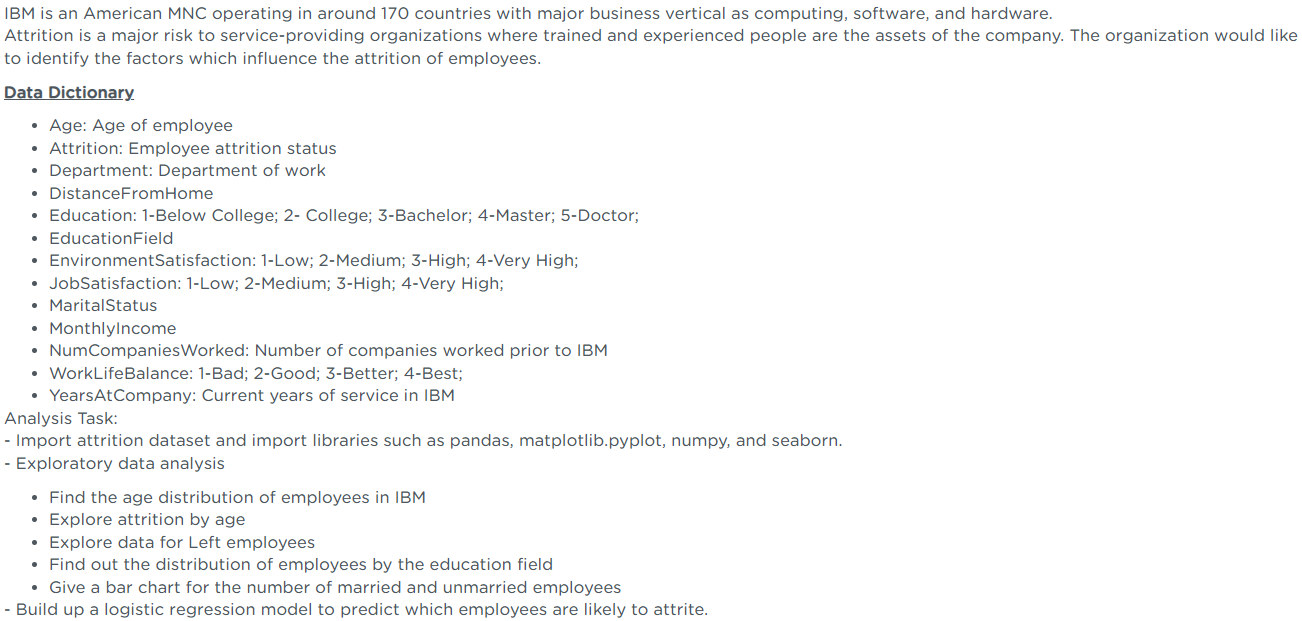

In [5]:
#Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np
#seaborn is for rich formatted graphs
import seaborn as sns 

In [6]:
#declare the paths
input_files = r'D:\\Educational\\Simpli Learn AI Course\\DataScience with Python\\Practice Project Lesson 8\\'

In [7]:
#import data
ibm_001 = pd.read_csv(input_files+'IBM Attrition Data.csv')

In [8]:
ibm_001.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [9]:
ibm_001.shape

(1470, 13)

In [10]:
ibm_001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [11]:
ibm_001.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

## Exploratory Data Analysis
### Q1: Find the Age distribution of employees in IBM

In [12]:
max(ibm_001['Age'])

60

In [13]:
min(ibm_001['Age'])

18

In [14]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

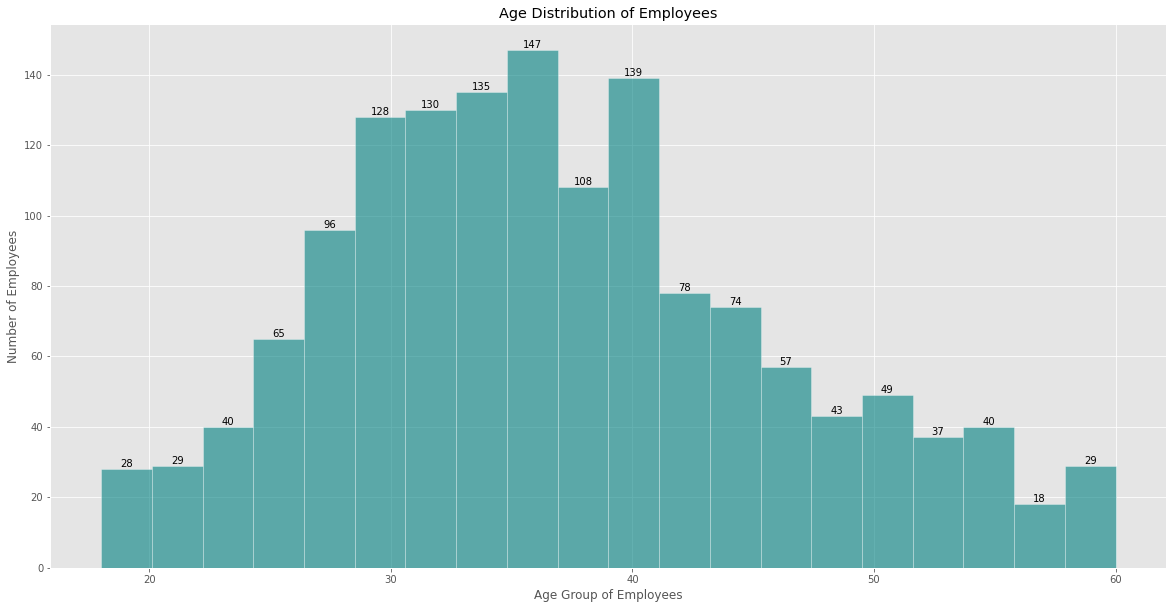

In [15]:
#building a histogram on the Age column with bin size as 5 
style.use('ggplot')
plt.figure(figsize = (20, 10))
#plt.hist(ibm_001['Age'], bins=20, color= 'red', label = 'str', alpha = 0.5)
values,bins,bars = plt.hist(ibm_001['Age'], bins=20, color= 'teal', label = 'str', alpha = 0.6, edgecolor = 'white')
plt.xlabel('Age Group of Employees')
plt.ylabel('Number of Employees')
plt.title('Age Distribution of Employees')
plt.bar_label(bars, color='k')
plt.grid(True)
plt.show()

### Q2: Explore attrition by age

In [16]:
#Group by Attrition type
ibm_002_attrition = ibm_001.groupby('Attrition')

In [17]:
ibm_003_attrition = ibm_002_attrition.get_group('Yes')
ibm_003_stay = ibm_002_attrition.get_group('No')

In [18]:
ibm_003_attrition.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
14,28,Yes,Research & Development,24,3,Life Sciences,3,3,Single,2028,5,3,4
21,36,Yes,Sales,9,4,Life Sciences,3,1,Single,3407,7,3,5
24,34,Yes,Research & Development,6,1,Medical,2,1,Single,2960,2,3,4


In [19]:
ibm_003_stay.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,No,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,No,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1


In [20]:
ibm_003_attrition.shape

(237, 13)

In [21]:
ibm_003_stay.shape

(1233, 13)

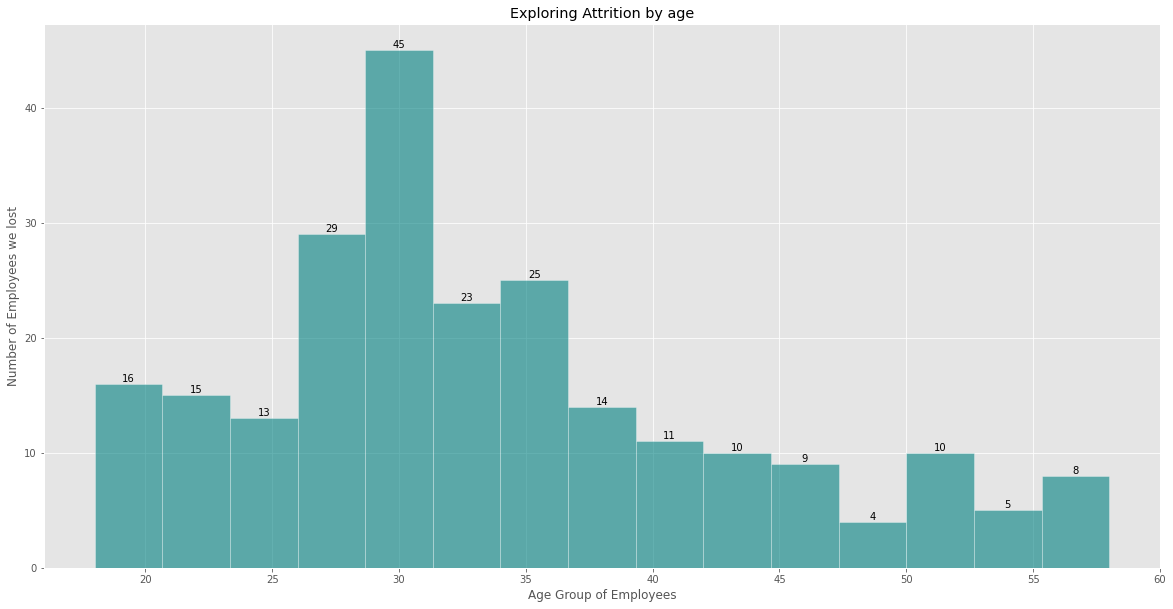

In [22]:
# keep a histogram plot for this dataset
style.use('ggplot')
plt.figure(figsize = (20, 10))
#plt.hist(ibm_001['Age'], bins=15, color= 'red', label = 'str', alpha = 0.5)
values,bins,bars = plt.hist(ibm_003_attrition['Age'], bins=15, color= 'teal', label = 'str', alpha = 0.6, edgecolor = 'white')
plt.xlabel('Age Group of Employees')
plt.ylabel('Number of Employees we lost')
plt.title('Exploring Attrition by age')
plt.bar_label(bars, color='k')
plt.show()

### Q3: Explore data for left employees

In [23]:
ibm_003_attrition.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [24]:
#applying the heat map of attrition vs rest of the factors to understand which fctors are impacting the most
num_cols = ['Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany']
len(num_cols)


12

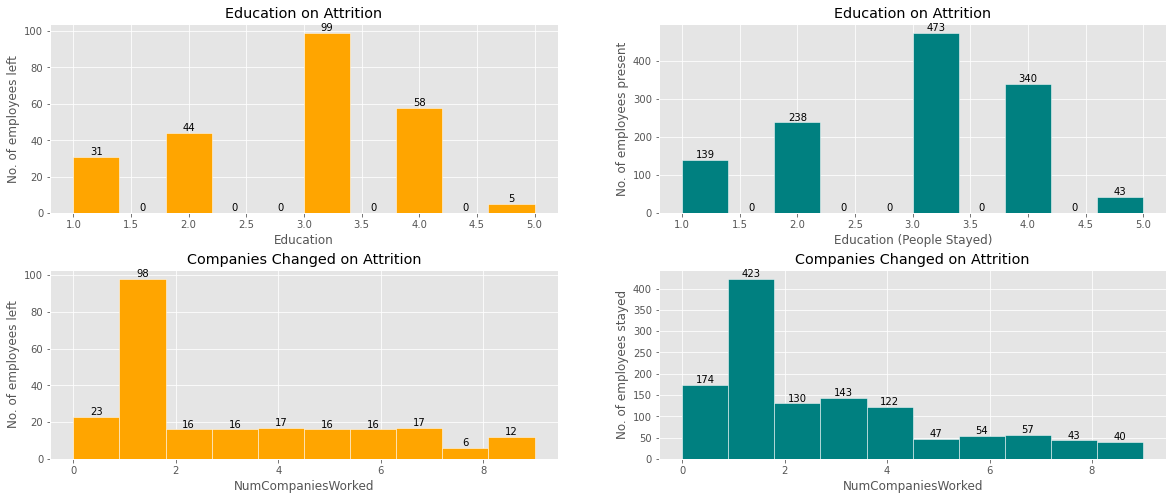

In [33]:
style.use('ggplot')
plt.figure(figsize = (20,8))
plt.subplots_adjust(hspace = 0.3)
plt.subplot(2,2,1)
#fig = plt.figure(figsize = (7, 4))
values, bins, bars = plt.hist(ibm_003_attrition['Education'], color = 'orange', edgecolor = 'White')
plt.title('Education on Attrition')
plt.xlabel('Education')
plt.ylabel('No. of employees left')
plt.bar_label(bars)

plt.subplot(2,2,2)
#fig = plt.figure(figsize = (7, 4))
values, bins, bars = plt.hist(ibm_003_stay['Education'], color = 'teal', edgecolor = 'White')
plt.title('Education on Attrition')
plt.xlabel('Education (People Stayed)')
plt.ylabel('No. of employees present')
plt.bar_label(bars)

plt.subplot(2,2,3)
#fig = plt.figure(figsize = (7, 4))
values, bins, bars = plt.hist(ibm_003_attrition['NumCompaniesWorked'], color = 'orange', edgecolor = 'White')
plt.title('Companies Changed on Attrition')
plt.xlabel('NumCompaniesWorked')
plt.ylabel('No. of employees left')
plt.bar_label(bars)

plt.subplot(2,2,4)
#fig = plt.figure(figsize = (7, 4))
values, bins, bars = plt.hist(ibm_003_stay['NumCompaniesWorked'], color = 'teal', edgecolor = 'White')
plt.title('Companies Changed on Attrition')
plt.xlabel('NumCompaniesWorked')
plt.ylabel('No. of employees stayed')
plt.bar_label(bars)

plt.show()


### Q4: Explore distribution of employees by education field
**`Stacked Bar chart`**

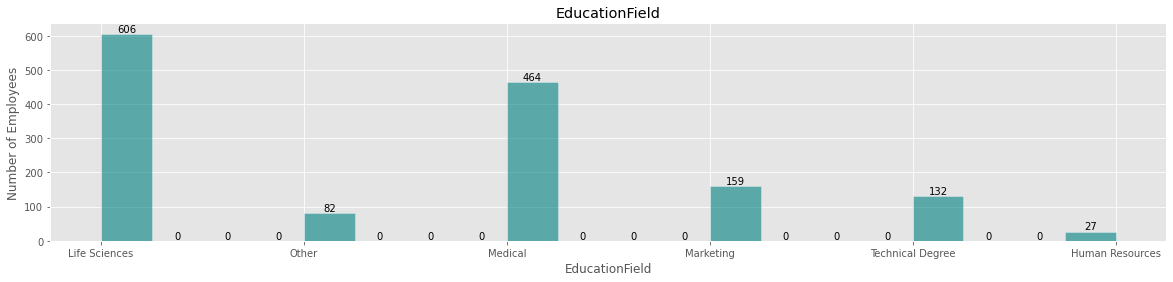

In [37]:
#simple bar chart - stacked withattrition
style.use('ggplot')
plt.figure(figsize = (20, 4))
#plt.hist(ibm_001['Age'], bins=20, color= 'red', label = 'str', alpha = 0.5)
values,bins,bars = plt.hist(ibm_001['EducationField'], bins=20, color= 'teal', label = 'str', alpha = 0.6, edgecolor = 'white')
plt.xlabel('EducationField')
plt.ylabel('Number of Employees')
plt.title('EducationField')
plt.bar_label(bars, color='k')
plt.grid(True)
plt.show()

Pie Chart

In [27]:
#plt.figure(figsize = (10, 10))
#plt.pie(ibm_001['EducationField'].count)
ibm_001['EducationField'].count

<bound method Series.count of 0       Life Sciences
1       Life Sciences
2               Other
3       Life Sciences
4             Medical
            ...      
1465          Medical
1466          Medical
1467    Life Sciences
1468          Medical
1469          Medical
Name: EducationField, Length: 1470, dtype: object>

### Q5: Give a bar chart for the number of married and unmarried employees

In [44]:
#to check if there are any NA's in the data
ibm_001.isna().sum(axis=0)
ibm_001.shape[0]
ibm_001.shape[1]
ibm_001.shape
(ibm_001.isna().sum(axis=0)/ibm_001.shape[0])*100

Age                        0.0
Attrition                  0.0
Department                 0.0
DistanceFromHome           0.0
Education                  0.0
EducationField             0.0
EnvironmentSatisfaction    0.0
JobSatisfaction            0.0
MaritalStatus              0.0
MonthlyIncome              0.0
NumCompaniesWorked         0.0
WorkLifeBalance            0.0
YearsAtCompany             0.0
dtype: float64

In [50]:
pip install pyautogui

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyautogui in c:\users\rishi\anaconda3\lib\site-packages (0.9.53)



In [52]:
pip install time

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [55]:
import pyautogui
import time

def fun():
    while True:
        pyautogui.press("ctrl")
        print("Pressed ctrl")
        time.sleep(120) 

In [ ]:
fun()

Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
Pressed ctrl
